In [112]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [113]:
data=pd.read_csv('baseball.csv')

In [114]:
data.head()

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
0,95,724,5575,1497,300,42,139,383,973,104,641,601,3.73,2,8,56,88
1,83,696,5467,1349,277,44,156,439,1264,70,700,653,4.07,2,12,45,86
2,81,669,5439,1395,303,29,141,533,1157,86,640,584,3.67,11,10,38,79
3,76,622,5533,1381,260,27,136,404,1231,68,701,643,3.98,7,9,37,101
4,74,689,5605,1515,289,49,151,455,1259,83,803,746,4.64,7,12,35,86


In [115]:
data.shape

(30, 17)

In [116]:
data.columns=['Wins','Runs','At Bats','Hits','Doubles','Triples','Homeruns','Walks','Strikeouts','Stolen Bases','Runs Allowed','Earned Runs','Earned Run Average(ERA)','Complete Game','Shutouts','Saves','Error']

In [117]:
data.head()

,Wins,Runs,At Bats,Hits,Doubles,Triples,Homeruns,Walks,Strikeouts,Stolen Bases,Runs Allowed,Earned Runs,Earned Run Average(ERA),Complete Game,Shutouts,Saves,Error
0,95,724,5575,1497,300,42,139,383,973,104,641,601,3.73,2,8,56,88
1,83,696,5467,1349,277,44,156,439,1264,70,700,653,4.07,2,12,45,86
2,81,669,5439,1395,303,29,141,533,1157,86,640,584,3.67,11,10,38,79
3,76,622,5533,1381,260,27,136,404,1231,68,701,643,3.98,7,9,37,101
4,74,689,5605,1515,289,49,151,455,1259,83,803,746,4.64,7,12,35,86


In [118]:
data.describe()

,Wins,Runs,At Bats,Hits,Doubles,Triples,Homeruns,Walks,Strikeouts,Stolen Bases,Runs Allowed,Earned Runs,Earned Run Average(ERA),Complete Game,Shutouts,Saves,Error
count,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.00000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000
mean,80.966667,688.233333,5516.266667,1403.533333,274.733333,31.300000,163.633333,469.100000,1248.20000,83.500000,688.233333,635.833333,3.956333,3.466667,11.300000,43.066667,94.333333
std,10.453455,58.761754,70.467372,57.140923,18.095405,10.452355,31.823309,57.053725,103.75947,22.815225,72.108005,70.140786,0.454089,2.763473,4.120177,7.869335,13.958889
min,63.000000,573.000000,5385.000000,1324.000000,236.000000,13.000000,100.000000,375.000000,973.00000,44.000000,525.000000,478.000000,2.940000,0.000000,4.000000,28.000000,75.000000
25%,74.000000,651.250000,5464.000000,1363.000000,262.250000,23.000000,140.250000,428.250000,1157.50000,69.000000,636.250000,587.250000,3.682500,1.000000,9.000000,37.250000,86.000000
50%,81.000000,689.000000,5510.000000,1382.500000,275.500000,31.000000,158.500000,473.000000,1261.50000,83.500000,695.500000,644.500000,4.025000,3.000000,12.000000,42.000000,91.000000
75%,87.750000,718.250000,5570.000000,1451.500000,288.750000,39.000000,177.000000,501.250000,1311.50000,96.500000,732.500000,679.250000,4.220000,5.750000,13.000000,46.750000,96.750000
max,100.000000,891.000000,5649.000000,1515.000000,308.000000,49.000000,232.000000,570.000000,1518.00000,134.000000,844.000000,799.000000,5.040000,11.000000,21.000000,62.000000,126.000000


In [80]:
data.corr()

,Wins,Runs,At Bats,Hits,Doubles,Triples,Homeruns,Walks,Strikeouts,Stolen Bases,Runs Allowed,Earned Runs,Earned Run Average(ERA),Complete Game,Shutouts,Saves,Error
Wins,1.000000,0.430751,-0.087947,0.037612,0.427797,-0.251118,0.307407,0.484342,0.111850,-0.157234,-0.812952,-0.809435,-0.819600,0.080533,0.471805,0.666530,-0.089485
Runs,0.430751,1.000000,0.319464,0.482856,0.560084,-0.070072,0.671283,0.402452,-0.054726,0.081367,-0.041623,-0.041245,-0.049281,0.232042,-0.103274,-0.096380,-0.023262
At Bats,-0.087947,0.319464,1.000000,0.739122,0.453370,0.435422,-0.066983,-0.136414,-0.106022,0.372618,0.316010,0.309686,0.255551,-0.080876,-0.197321,-0.106367,0.316743
Hits,0.037612,0.482856,0.739122,1.000000,0.566847,0.478694,-0.090855,-0.118281,-0.398830,0.413444,0.224324,0.252489,0.231172,0.147955,-0.145559,-0.130371,-0.033173
Doubles,0.427797,0.560084,0.453370,0.566847,1.000000,0.220490,0.056292,0.302700,-0.150752,0.195027,-0.218160,-0.235531,-0.254854,0.306675,0.057998,0.171576,0.105754
Triples,-0.251118,-0.070072,0.435422,0.478694,0.220490,1.000000,-0.430915,-0.454949,-0.141196,0.457437,0.314125,0.340225,0.330951,-0.065898,-0.041396,-0.142370,0.126678
Homeruns,0.307407,0.671283,-0.066983,-0.090855,0.056292,-0.430915,1.000000,0.425691,0.359923,-0.136567,-0.103903,-0.085922,-0.090917,0.156502,-0.019119,-0.028540,-0.207597
Walks,0.484342,0.402452,-0.136414,-0.118281,0.302700,-0.454949,0.425691,1.000000,0.233652,-0.098347,-0.416445,-0.452663,-0.459832,0.462478,0.426004,0.099445,-0.075685
Strikeouts,0.111850,-0.054726,-0.106022,-0.398830,-0.150752,-0.141196,0.359923,0.233652,1.000000,0.030968,-0.129745,-0.161612,-0.180368,-0.093418,0.237721,0.126297,0.155133
Stolen Bases,-0.157234,0.081367,0.372618,0.413444,0.195027,0.457437,-0.136567,-0.098347,0.030968,1.000000,0.132290,0.143068,0.126063,-0.020783,-0.106563,-0.183418,0.079149


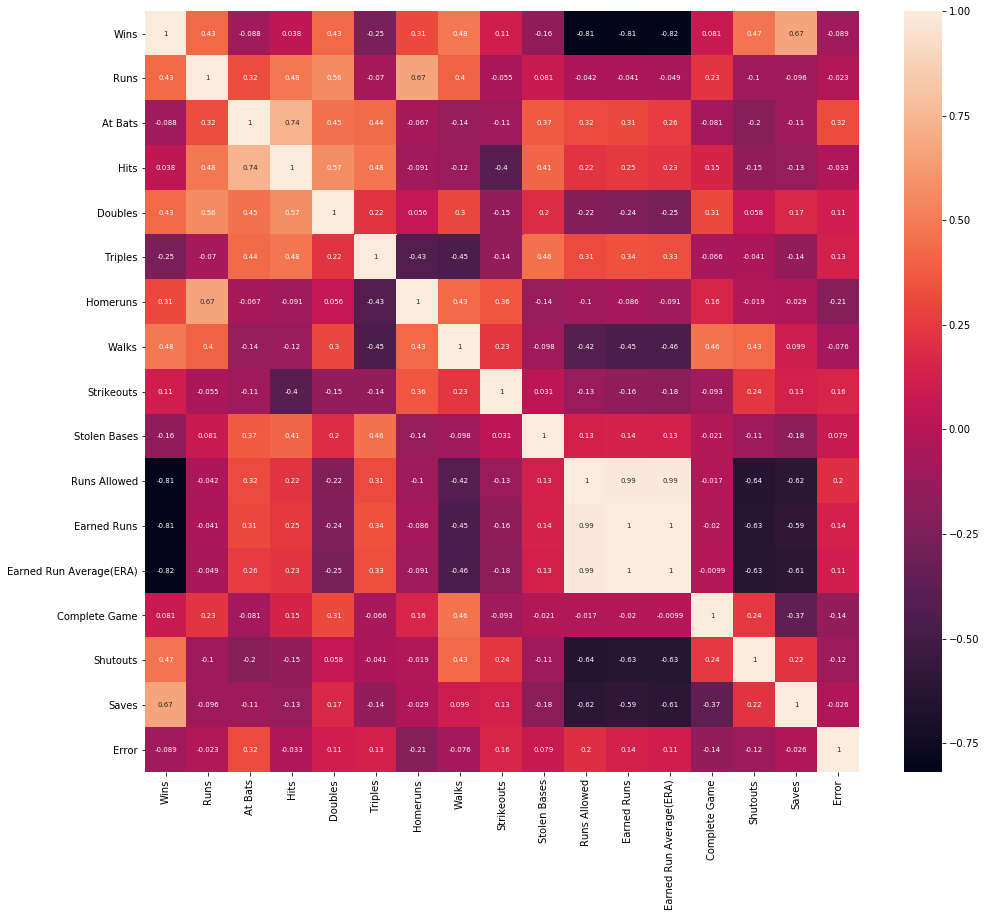

In [81]:
plt.figure(figsize=(16,14))
sns.heatmap(data.corr(),annot=True, annot_kws={"size": 7})

In [82]:
data.drop(['Earned Run Average(ERA)'],axis=1,inplace=True)

In [119]:
data.shape

(30, 17)

In [84]:
data.isnull().sum()

Wins             0
Runs             0
At Bats          0
Hits             0
Doubles          0
Triples          0
Homeruns         0
Walks            0
Strikeouts       0
Stolen Bases     0
Runs Allowed     0
Earned Runs      0
Complete Game    0
Shutouts         0
Saves            0
Error            0
dtype: int64

In [85]:
collist=data.columns.values
ncol=17
nrow=3

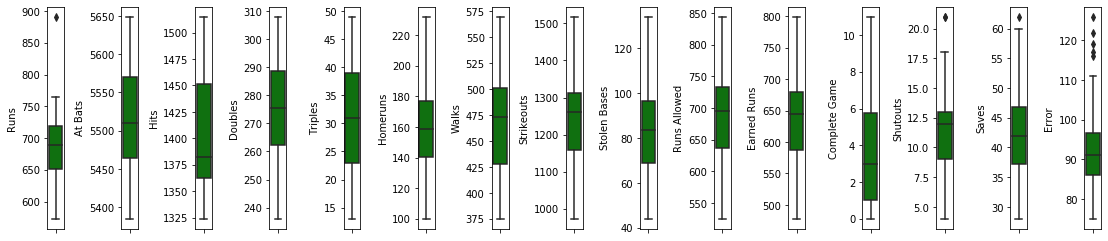

In [86]:
plt.figure(figsize=(ncol,10))
for i in range(1,len(collist)):
    plt.subplot(nrow,ncol,i+1)
    sns.boxplot(data[collist[i]],color='green',orient='v')
    plt.tight_layout()

In [87]:
data.shape

(30, 16)

In [120]:
from scipy.stats import zscore
z_score=np.abs(zscore(data))
data=data[(z_score<3).all(axis=1)]
data.shape

(29, 17)

In [89]:
data.describe()

,Wins,Runs,At Bats,Hits,Doubles,Triples,Homeruns,Walks,Strikeouts,Stolen Bases,Runs Allowed,Earned Runs,Complete Game,Shutouts,Saves,Error
count,29.000000,29.000000,29.000000,29.000000,29.000000,29.000000,29.000000,29.000000,29.000000,29.000000,29.000000,29.000000,29.000000,29.000000,29.000000,29.000000
mean,80.551724,681.241379,5516.517241,1400.896552,273.586207,31.793103,161.275862,465.620690,1251.551724,83.344828,688.862069,636.758621,3.344828,11.344828,43.379310,94.551724
std,10.384006,45.357040,71.701076,56.264265,17.269952,10.276114,29.600792,54.728821,103.930123,23.202949,73.300616,71.195734,2.729153,4.185655,7.816712,14.153713
min,63.000000,573.000000,5385.000000,1324.000000,236.000000,13.000000,100.000000,375.000000,973.000000,44.000000,525.000000,478.000000,0.000000,4.000000,28.000000,75.000000
25%,74.000000,650.000000,5463.000000,1363.000000,262.000000,26.000000,140.000000,426.000000,1159.000000,69.000000,635.000000,584.000000,1.000000,9.000000,38.000000,86.000000
50%,81.000000,689.000000,5511.000000,1382.000000,274.000000,32.000000,156.000000,471.000000,1264.000000,83.000000,698.000000,646.000000,3.000000,12.000000,43.000000,92.000000
75%,87.000000,713.000000,5571.000000,1420.000000,288.000000,39.000000,177.000000,496.000000,1312.000000,97.000000,733.000000,680.000000,5.000000,13.000000,47.000000,97.000000
max,100.000000,764.000000,5649.000000,1515.000000,303.000000,49.000000,230.000000,567.000000,1518.000000,134.000000,844.000000,799.000000,11.000000,21.000000,62.000000,126.000000


In [90]:
data.dtypes

Wins             int64
Runs             int64
At Bats          int64
Hits             int64
Doubles          int64
Triples          int64
Homeruns         int64
Walks            int64
Strikeouts       int64
Stolen Bases     int64
Runs Allowed     int64
Earned Runs      int64
Complete Game    int64
Shutouts         int64
Saves            int64
Error            int64
dtype: object

In [121]:
data.skew()

Wins                       0.119013
Runs                      -0.215364
At Bats                    0.169573
Hits                       0.783772
Doubles                   -0.335304
Triples                    0.090124
Homeruns                   0.450862
Walks                      0.151193
Strikeouts                -0.233815
Stolen Bases               0.494966
Runs Allowed               0.018155
Earned Runs                0.018461
Earned Run Average(ERA)    0.016693
Complete Game              0.854980
Shutouts                   0.526943
Saves                      0.627480
Error                      0.840271
dtype: float64

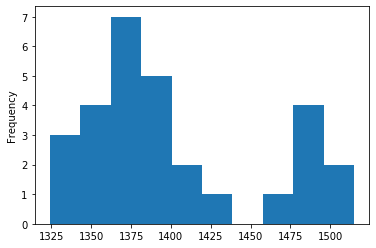

In [92]:
data['Hits'].plot.hist()

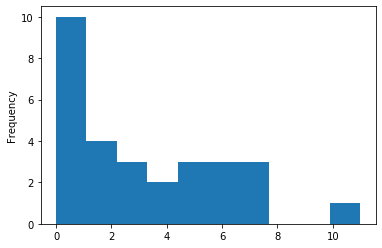

In [93]:
data['Complete Game'].plot.hist()

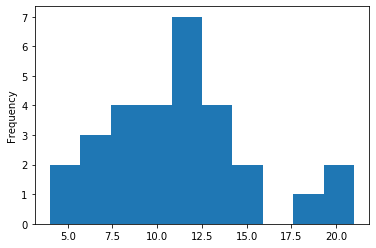

In [94]:
data['Shutouts'].plot.hist()

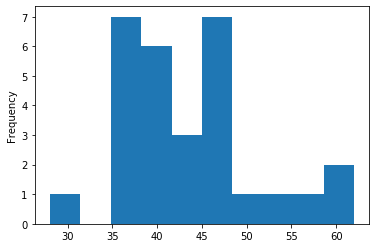

In [95]:
data['Saves'].plot.hist()

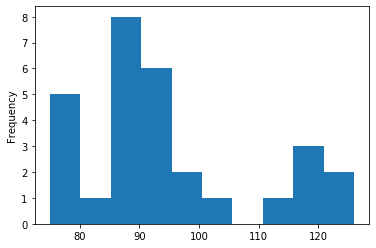

In [96]:
data['Error'].plot.hist()

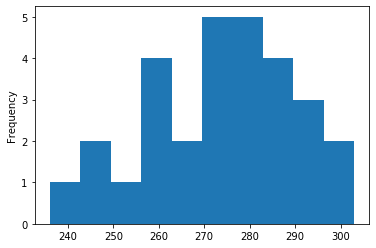

In [97]:
data['Doubles'].plot.hist()

In [98]:
skewed=['Hits','Complete Game','Shutouts','Saves','Error']
for i in skewed:
    data[i]=np.log1p(data[i])

In [99]:
data.skew()

Wins             0.119013
Runs            -0.215364
At Bats          0.169573
Hits             0.738455
Doubles         -0.335304
Triples          0.090124
Homeruns         0.450862
Walks            0.151193
Strikeouts      -0.233815
Stolen Bases     0.494966
Runs Allowed     0.018155
Earned Runs      0.018461
Complete Game   -0.275681
Shutouts        -0.598073
Saves            0.109983
Error            0.586101
dtype: float64

In [122]:
from scipy.stats import boxcox
data['Hits']=boxcox(data['Hits'],0)

In [101]:
data.skew()

Wins             0.119013
Runs            -0.215364
At Bats          0.169573
Hits             0.732096
Doubles         -0.335304
Triples          0.090124
Homeruns         0.450862
Walks            0.151193
Strikeouts      -0.233815
Stolen Bases     0.494966
Runs Allowed     0.018155
Earned Runs      0.018461
Complete Game   -0.275681
Shutouts        -0.598073
Saves            0.109983
Error            0.586101
dtype: float64

In [123]:
y=data.iloc[:,0:1]
y.shape

(29, 1)

In [124]:
x=data.iloc[:,1:]
x.shape

(29, 16)

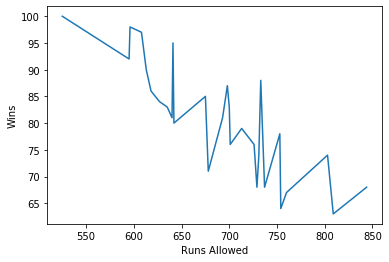

In [104]:
sns.lineplot(x='Runs Allowed',y='Wins',data=data)

In [125]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
def r2scoref(reg,x,y):
    max_r_score=0
    for r in range(42,100):
        x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=r,test_size=0.20)
        reg.fit(x_train,y_train)
        y_pred=reg.predict(x_test)
        r2_scr=r2_score(y_test,y_pred)
        if r2_scr>max_r_score:
            max_r_score=r2_scr
            r_state=r
            plt.scatter(x=y_test,y=y_pred)
    print('Maximum r2 score corresponding to random state',r_state,'is',max_r_score)
    return(r_state)

Maximum r2 score corresponding to random state 64 is 0.8543536059259641


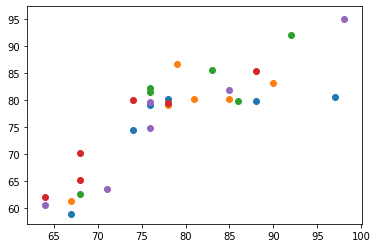

In [126]:
from sklearn.linear_model import LinearRegression
lreg=LinearRegression()
r_state=r2scoref(lreg,x,y)

Maximum r2 score corresponding to random state 82 is 0.7819977212305353


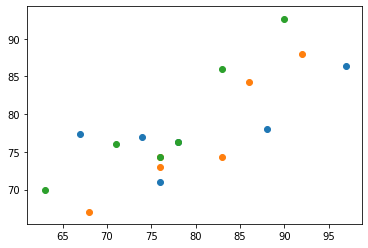

In [127]:
from sklearn.neighbors import KNeighborsRegressor
knr=KNeighborsRegressor(n_neighbors=3)
r_state=r2scoref(knr,x,y)

Maximum r2 score corresponding to random state 47 is 0.9596196622418995


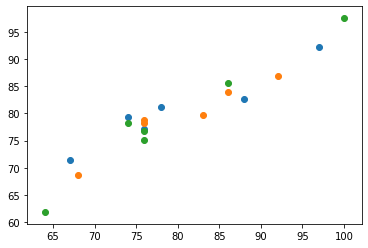

In [128]:
from sklearn.linear_model import Lasso
lso=Lasso(alpha=0.1)
r_state=r2scoref(lso,x,y)

In [132]:
from sklearn.model_selection import cross_val_score
print('Mean r2_score for Lasso regression is:',cross_val_score(lso,x,y,cv=5,scoring="r2").mean())
print('Standard Deviation for Lasso regression is :',cross_val_score(lso,x,y,cv=5,scoring="r2").std())


Mean r2_score for Lasso regression is: 0.335357026598491
Standard Deviation for Lasso regression is : 0.6684973383200962


In [ ]:
from sklearn.externals import joblib
joblib.dump(lso,'Baseball_winpred.pkl')